In [1]:
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset
import seaborn as sns
%matplotlib inline

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 20
pd.options.display.float_format = '{:.4f}'.format

In [2]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def find_na(df):
    l = []
    for label in df.columns:
        if df[label].dropna().shape[0] != df.shape[0]:
            l.append(label)
    return l

In [3]:
train = pd.read_csv("./train.csv", sep=",")
test = pd.read_csv("./test.csv", sep=",")
example = pd.read_csv("./gender_submission.csv", sep=",")

In [4]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

/home/rainbowww5/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


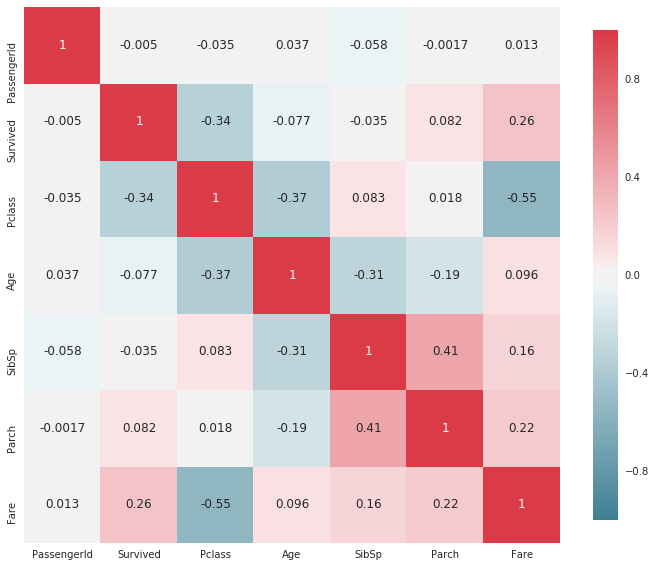

In [5]:
plot_correlation_map(train)
# Try 'Fare', 'Pclass'

/home/rainbowww5/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


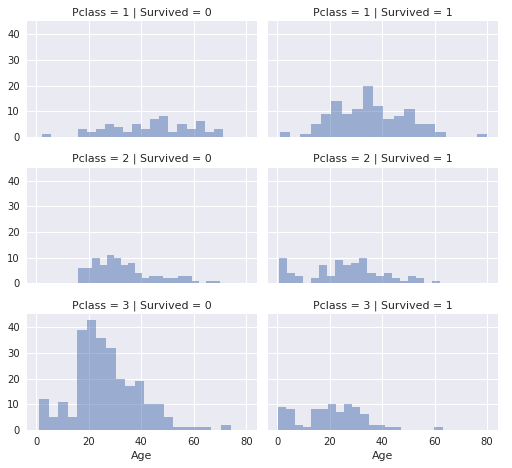

In [6]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/home/rainbowww5/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


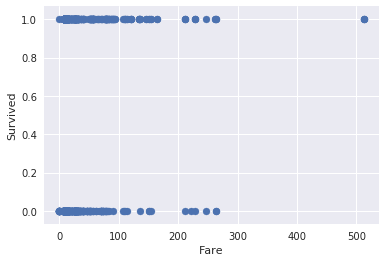

In [7]:
plt.scatter(train['Fare'], train['Survived'])
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.show()

/home/rainbowww5/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


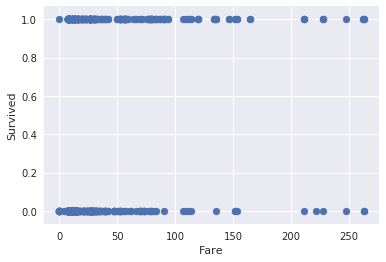

In [8]:
train = train[train.Fare < 300]
plt.scatter(train['Fare'], train['Survived'])
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.show()

In [9]:
train[ 'Age' ] = train.Age.fillna(train.Age.mean() )
test[ 'Age' ] = test.Age.fillna(train.Age.mean() )
combine = [train, test]

/home/rainbowww5/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

/home/rainbowww5/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [11]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Others')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

/home/rainbowww5/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/rainbowww5/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/rainbowww5/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,Title,Survived
0,Master,0.5750
1,Miss,0.7011
2,Mr,0.1534
3,Mrs,0.7937
4,Others,0.3478


In [12]:
   for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)
for dataset in combine:
    dataset['IsAlone'] = 'No'
    dataset.loc[dataset['FamilySize'] == 0, 'IsAlone'] = 'Yes'

train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()
train = train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test = test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)

combine = [train, test]

train.head()

/home/rainbowww5/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/rainbowww5/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/rainbowww5/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0000,A/5 21171,7.2500,NaN,S,Mr,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0000,PC 17599,71.2833,C85,C,Mrs,No
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0000,STON/O2. 3101282,7.9250,NaN,S,Miss,No
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,113803,53.1000,C123,S,Mrs,No
4,5,0,3,"Allen, Mr. William Henry",male,35.0000,373450,8.0500,NaN,S,Mr,No


In [13]:
testclean = pd.DataFrame()

# Fill missing values of Age with the average of Age (mean)
testclean['PassengerId'] = test['PassengerId']
testclean[ 'Age' ] = test['Age'].astype(int)

# Fill missing values of Fare with the average of Fare (mean)
testclean['Sex'] = test['Sex']
testclean['Title'] = test['Title']
testclean['Fare'] = test['Fare']
testclean['IsAlone'] = test['IsAlone']
testclean

,PassengerId,Age,Sex,Title,Fare,IsAlone
0,892,34,male,Mr,7.8292,No
1,893,47,female,Mrs,7.0000,No
2,894,62,male,Mr,9.6875,No
3,895,27,male,Mr,8.6625,No
4,896,22,female,Mrs,12.2875,No
5,897,14,male,Mr,9.2250,No
6,898,30,female,Miss,7.6292,No
7,899,26,male,Mr,29.0000,No
8,900,18,female,Mrs,7.2292,No
9,901,21,male,Mr,24.1500,No


In [14]:
trainclean = pd.DataFrame()

# Fill missing values of Age with the average of Age (mean)
trainclean[ 'Age' ] = train['Age'].astype(int)

# Fill missing values of Fare with the average of Fare (mean)
trainclean['Sex'] = train['Sex']
trainclean['Title'] = train['Title']
trainclean['IsAlone'] = train['IsAlone']
trainclean['Fare'] = train['Fare']
trainclean['Survived'] = train['Survived']
trainclean.head()

,Age,Sex,Title,IsAlone,Fare,Survived
0,22,male,Mr,No,7.2500,0
1,38,female,Mrs,No,71.2833,1
2,26,female,Miss,No,7.9250,1
3,35,female,Mrs,No,53.1000,1
4,35,male,Mr,No,8.0500,0


In [15]:
testclean.head()

,PassengerId,Age,Sex,Title,Fare,IsAlone
0,892,34,male,Mr,7.8292,No
1,893,47,female,Mrs,7.0000,No
2,894,62,male,Mr,9.6875,No
3,895,27,male,Mr,8.6625,No
4,896,22,female,Mrs,12.2875,No


In [16]:
trainclean = trainclean.reindex(
    np.random.permutation(trainclean.index))
find_na(trainclean)
#find_na(testclean)

[]

In [17]:
def preprocess_features(train):

  selected_features = train[
    ["Sex",
     "Title",
    "IsAlone",
     "Age"
    ]]
  processed_features = selected_features.copy()
  return processed_features

def preprocess_targets(train):

  output_targets = pd.DataFrame()
  output_targets["Survived"] = (
    train["Survived"] > 0.7).astype(float)
  return output_targets

In [18]:
training_examples = preprocess_features(trainclean.head(700))
training_targets = preprocess_targets(trainclean.head(700))

validation_examples = preprocess_features(trainclean.tail(191))
validation_targets = preprocess_targets(trainclean.tail(191))

# print("Training examples summary:")
# display.display(training_examples.describe())
# print("Validation examples summary:")
# display.display(validation_examples.describe())

# print("Training targets summary:")
# display.display(training_targets.describe())
# print("Validation targets summary:")
# display.display(validation_targets.describe())

In [19]:
def construct_feature_columns(input_features):
    sex = tf.feature_column.indicator_column(
        tf.feature_column.categorical_column_with_vocabulary_list(
            key="Sex",
            vocabulary_list=["male", "female"]
            ))
    
    title_names = ["Master", "Miss", "Mr", "Mrs", "Others"]
    title = tf.feature_column.indicator_column(
        tf.feature_column.categorical_column_with_vocabulary_list(
            key="Title",
            vocabulary_list=title_names))
    
    alone = tf.feature_column.indicator_column(
        tf.feature_column.categorical_column_with_vocabulary_list(
            key="IsAlone",
            vocabulary_list=["Alone", "NotAlone"]))
    
    age_column = tf.feature_column.numeric_column("Age")
    age = tf.feature_column.bucketized_column(
        source_column = age_column,
        boundaries= [16,32,48,64])
    feature_columns = set([sex, title, alone, age])
    return feature_columns

In [20]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
 
    features = {key:np.array(value) for key,value in dict(features).items()}                                            
 
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    if shuffle:
      ds = ds.shuffle(10000)
    
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [21]:
def train_linear_classifier_model(
    learning_rate,
    steps,
    batch_size,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
  """Trains a linear classification model.
  
  In addition to training, this function also prints training progress information,
  as well as a plot of the training and validation loss over time.
  
  Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    training_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for training.
    training_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for training.
    validation_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for validation.
    validation_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for validation.
      
  Returns:
    A `LinearClassifier` object trained on the training data.
  """

  periods = 10
  steps_per_period = steps / periods
  
  # Create a linear classifier object.
  my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)  
  linear_classifier = tf.estimator.LinearClassifier(
      feature_columns=construct_feature_columns(training_examples),
      optimizer=my_optimizer
  )
  
  # Create input functions.
  training_input_fn = lambda: my_input_fn(training_examples, 
                                          training_targets["Survived"], 
                                          batch_size=batch_size)
  predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                  training_targets["Survived"], 
                                                  num_epochs=1, 
                                                  shuffle=False)
  predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                    validation_targets["Survived"], 
                                                    num_epochs=1, 
                                                    shuffle=False)
  
  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("LogLoss (on training data):")
  training_log_losses = []
  validation_log_losses = []
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    linear_classifier.train(
        input_fn=training_input_fn,
        steps=steps_per_period
    )
    # Take a break and compute predictions.    
    training_probabilities = linear_classifier.predict(input_fn=predict_training_input_fn)
    training_probabilities = np.array([item['probabilities'] for item in training_probabilities])
    
    validation_probabilities = linear_classifier.predict(input_fn=predict_validation_input_fn)
    validation_probabilities = np.array([item['probabilities'] for item in validation_probabilities])
    
    training_log_loss = metrics.log_loss(training_targets, training_probabilities)
    validation_log_loss = metrics.log_loss(validation_targets, validation_probabilities)
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, training_log_loss))
    # Add the loss metrics from this period to our list.
    training_log_losses.append(training_log_loss)
    validation_log_losses.append(validation_log_loss)
  print("Model training finished.")
  
  # Output a graph of loss metrics over periods.
  plt.ylabel("LogLoss")
  plt.xlabel("Periods")
  plt.title("LogLoss vs. Periods")
  plt.tight_layout()
  plt.plot(training_log_losses, label="training")
  plt.plot(validation_log_losses, label="validation")
  plt.legend()

  return linear_classifier

################################################################################################################

def train_linear_regressor_model(
    learning_rate,
    steps,
    batch_size,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
  
  periods = 10
  steps_per_period = steps / periods

  my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  linear_regressor = tf.estimator.LinearRegressor(
      feature_columns=construct_feature_columns(training_examples),
      optimizer=my_optimizer
  )

  training_input_fn = lambda: my_input_fn(training_examples, 
                                          training_targets["Survived"], 
                                          batch_size=batch_size)
  predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                  training_targets["Survived"], 
                                                  num_epochs=1, 
                                                  shuffle=False)
  predict_validation_input_fn = lambda: my_input_fn(validation_examples,
                                                    validation_targets["Survived"],
                                                    num_epochs=1,
                                                    shuffle=False)


  print("Training model...")
  print("RMSE (on training data):")
  training_rmse = []
  validation_rmse = []
  for period in range (0, periods):
    linear_regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period
    )
    
    # Take a break and compute predictions.
    training_predictions = linear_regressor.predict(input_fn=predict_training_input_fn)
    training_predictions = np.array([item['predictions'][0] for item in training_predictions])
    
    validation_predictions = linear_regressor.predict(input_fn=predict_validation_input_fn)
    validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])
    
    # Compute training and validation loss.
    training_root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(training_predictions, training_targets))
    validation_root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(validation_predictions, validation_targets))
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, training_root_mean_squared_error))
    # Add the loss metrics from this period to our list.
    training_rmse.append(training_root_mean_squared_error)
    validation_rmse.append(validation_root_mean_squared_error)
  print("Model training finished.")
  
  # Output a graph of loss metrics over periods.
  plt.ylabel("RMSE")
  plt.xlabel("Periods")
  plt.title("Root Mean Squared Error vs. Periods")
  plt.tight_layout()
  plt.plot(training_rmse, label="training")
  plt.plot(validation_rmse, label="validation")
  plt.legend()

  return linear_regressor

In [22]:
training_examples

,Sex,Title,IsAlone,Age
296,male,Mr,No,23
668,male,Mr,No,43
541,female,Miss,No,9
380,female,Miss,No,42
386,male,Master,No,1
334,female,Mrs,No,29
312,female,Mrs,No,26
551,male,Mr,No,27
35,male,Mr,No,42
653,female,Miss,No,29


Training model...
RMSE (on training data):
  period 00 : 0.54
  period 01 : 0.48
  period 02 : 0.44
  period 03 : 0.42
  period 04 : 0.40
  period 05 : 0.40
  period 06 : 0.40
  period 07 : 0.40
  period 08 : 0.40
  period 09 : 0.40
Model training finished.


/home/rainbowww5/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


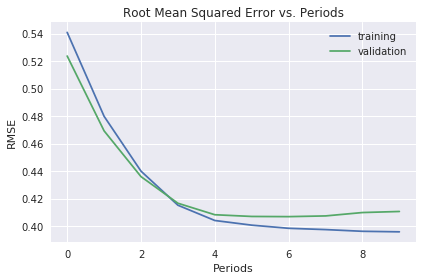

In [23]:
linear_regressor = train_linear_regressor_model(
    learning_rate=0.001,
    steps=200,
    batch_size=100,
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

/home/rainbowww5/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


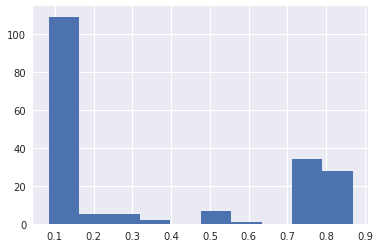

In [24]:
predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                  validation_targets["Survived"], 
                                                  num_epochs=1, 
                                                  shuffle=False)

validation_predictions = linear_regressor.predict(input_fn=predict_validation_input_fn)
validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])

_ = plt.hist(validation_predictions)

Training model...
LogLoss (on training data):
  period 00 : 0.51
  period 01 : 0.49
  period 02 : 0.49
  period 03 : 0.49
  period 04 : 0.49
  period 05 : 0.49
  period 06 : 0.49
  period 07 : 0.48
  period 08 : 0.48
  period 09 : 0.48
Model training finished.


/home/rainbowww5/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


AUC on the validation set: 0.79
Accuracy on the validation set: 0.76


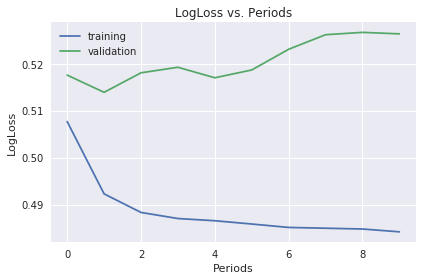

In [25]:
linear_classifier = train_linear_classifier_model(
    learning_rate=0.005,
    steps=500,
    batch_size=100,
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

evaluation_metrics = linear_classifier.evaluate(input_fn=predict_validation_input_fn)

print("AUC on the validation set: %0.2f" % evaluation_metrics['auc'])
print("Accuracy on the validation set: %0.2f" % evaluation_metrics['accuracy'])

In [26]:
evaluation_metrics = linear_classifier.evaluate(input_fn=predict_validation_input_fn)

print("AUC on the validation set: %0.2f" % evaluation_metrics['auc'])
print("Accuracy on the validation set: %0.2f" % evaluation_metrics['accuracy'])

AUC on the validation set: 0.79
Accuracy on the validation set: 0.76


/home/rainbowww5/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


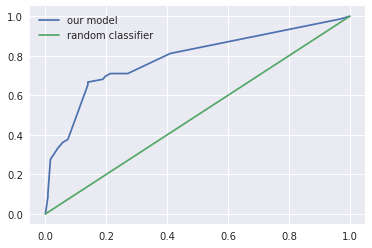

In [27]:
validation_probabilities = linear_classifier.predict(input_fn=predict_validation_input_fn)
# Get just the probabilities for the positive class.
validation_probabilities = np.array([item['probabilities'][1] for item in validation_probabilities])

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(
    validation_targets, validation_probabilities)
plt.plot(false_positive_rate, true_positive_rate, label="our model")
plt.plot([0, 1], [0, 1], label="random classifier")
_ = plt.legend(loc=2)

In [28]:
def my_test_input_fn(features, batch_size=1, shuffle=True, num_epochs=None):
   # Convert pandas data into a dict of np arrays.
   features = {key:np.array(value) for key,value in dict(features).items()}                                          
   
   # Construct a dataset, and configure batching/repeating.
   ds = Dataset.from_tensor_slices((features)) # warning: 2GB limit
   ds = ds.batch(batch_size).repeat(num_epochs)

   # Shuffle the data, if specified.
   if shuffle:
       ds = ds.shuffle(10000)
   
   # Return the next batch of data.
   features = ds.make_one_shot_iterator().get_next()
   return features


test_data = test

In [29]:
test_examples = preprocess_features(test_data)
predict_test_input_fn = lambda: my_test_input_fn(
       test_examples,
      num_epochs=1,
       shuffle=False)

# test_predictions = linear_regressor.predict(input_fn=predict_test_input_fn)
# test_predictions = np.array([item['predictions'][0] for item in test_predictions])
# x = []
# for ele in test_predictions:
#     if ele > 0.4:
#         x.append(1)
#     else:
#         x.append(0)
# x
# test_predictions = x
# #test_predictions

In [30]:
test_predictions = linear_classifier.predict(input_fn=predict_test_input_fn)
test_predictions = np.array([item['class_ids'][0] for item in test_predictions])
test_predictions


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [31]:
my_submission = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': test_predictions})
# you could use any filename. We choose submission here
my_submission.to_csv('submission_titanicnew.csv', index=False)

In [32]:
finaldf = pd.read_csv("./submission_titanicnew.csv", sep=",")
#finaldf

In [33]:
find_na(finaldf)

[]